In [1]:
import mne
import os
import scipy.io
import listen_italian_functions
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
from tqdm import tnrange, tqdm_notebook

data_path = os.path.dirname(os.path.dirname(os.getcwd()))

subject_name = ['Alice','Andrea']

In [2]:
import nitime
#Import the time-series objects:
from nitime.timeseries import TimeSeries
#Import the analysis objects:
from nitime.analysis import CoherenceAnalyzer

In [3]:
Tmin = 0
Tmax = 3.51
trial_len = 2

GA_epoches = []
for s in subject_name:
    save_path = data_path + '/analysis/python/data/'+s+'-coh-epo-'+str(Tmin)+'-'+str(Tmax)+'-trialLen-'+str(trial_len)+'.fif'
    epochs = mne.read_epochs(save_path)
    GA_epoches.append(epochs)
    print('----------------------------------------------------------------------------------------------------------------'+s)


This filename (C:\Users\SMukherjee\Desktop\projects\listen_italian_motor_entrainment/analysis/python/data/Alice-coh-epo-0-3.51-trialLen-2.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif or -epo.fif.gz
Reading C:\Users\SMukherjee\Desktop\projects\listen_italian_motor_entrainment/analysis/python/data/Alice-coh-epo-0-3.51-trialLen-2.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3507.50 ms
        0 CTF compensation matrices available
124 matching events found
No baseline correction applied
124 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
----------------------------------------------------------------------------------------------------------------Alice
This filename (C:\Users\SMukherjee\Desktop\projects\listen_italian_motor_entrainment/analysis/python/data/Andrea-coh-epo-0-3.51-trialLen-2.fif) does not conform to MNE naming conventions. All epochs

In [4]:
# let's explore some frequency bands
iter_freqs = [
    ('Delta', 1, 3),
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 40)
]
features = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
condition = ['Hyper','Normal','Hypo']
delay = np.arange(0,1.1,0.1)

In [51]:
s=0
d=0
feature=['envelop','jawaopening']
a = GA_epoches[s]
#a.filter(1,3)
hyper, normal, hypo = listen_italian_functions.coherence_preprocess(a,feature,d,trial_len)


124 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [52]:
data = hyper.get_data()
data.shape

(47, 61, 801)

In [68]:
f_lb = 1
f_ub = 3

T = ts.TimeSeries(data[0], sampling_rate=400)
C = CoherenceAnalyzer(T,method={'NFFT': 256})
freq_idx = np.where((C.frequencies > f_lb) * (C.frequencies < f_ub))[0]
idx1 = np.repeat(59,59)
idx2 = np.arange(0,59)
idx3 = np.repeat(60,59)

A = []
for i in range(0,1):
    T = ts.TimeSeries(data[i], sampling_rate=400)
    C = CoherenceAnalyzer(T,method={'NFFT': 512})
    coh = C.coherence_partial[idx1, idx2, idx3]
    coh = np.mean(coh[:, freq_idx], -1)
    A.append(coh)
    print(i)


0


In [69]:
coh

array([ 3.83383851e+31,             inf,             inf,             inf,
                   inf,             inf, -1.91691925e+31,             inf,
        3.83383851e+31, -1.91691925e+31, -1.91691925e+31,  1.91691925e+31,
                   inf,  3.83383851e+31,  3.83383851e+31,  3.83383851e+31,
                   inf,  3.83383851e+31,  3.83383851e+31,  3.83383851e+31,
                   inf,  3.83383851e+31,             inf,  3.83383851e+31,
       -1.91691925e+31,             inf,  3.83383851e+31,             inf,
                   inf,             inf, -1.91691925e+31,  1.91691925e+31,
       -1.91691925e+31,  1.91691925e+31,  3.83383851e+31,             inf,
       -1.91691925e+31,             inf,  3.83383851e+31,  3.83383851e+31,
       -1.91691925e+31,             inf,  3.83383851e+31,  1.27794617e+31,
        3.83383851e+31,             inf,  3.83383851e+31,  3.83383851e+31,
                   inf,  3.83383851e+31,             inf, -1.91691925e+31,
        3.83383851e+31,  

In [25]:
import nitime.timeseries as ts


In [47]:
C.coherence_partial

CoherenceAnalyzer(method={'NFFT': 512, 'Fs': 400.0 Hz, 'n_overlap': 32}, unwrap_phases='MISSING')

In [ ]:
C = CoherenceAnalyzer(T,method={'this_method': 'multi_taper_csd','adaptive':'True','low_bias':'True'})
C.frequencies

In [46]:
C = CoherenceAnalyzer(T,method={'NFFT': 512})
C.frequencies[51]

39.84375

In [40]:
C.coherence.shape

(61, 61, 257)

In [29]:
C.coherence_partial.shape

(61, 61, 61, 129)

In [30]:
from nitime.viz import drawmatrix_channels

data_path = os.path.dirname(os.path.dirname(os.getcwd()))
raw_fname = data_path + '/analysis/python/data/Elena_raw.fif'
raw = mne.io.read_raw_fif(raw_fname,preload=True)
info=raw.pick_types(eeg=True, stim=False,misc=False)


Opening raw data file C:\Users\SMukherjee\Desktop\projects\listen_italian_motor_entrainment\analysis\python\data\Elena_raw.fif...
    Range : 40502 ... 1132918 =     40.502 ...  1132.918 secs
Ready.
Reading 0 ... 1092416  =      0.000 ...  1092.416 secs...


In [33]:
f_lb = 4
f_ub = 8
freq_idx = np.where((C.frequencies > f_lb) * (C.frequencies < f_ub))[0]

idx1 = np.repeat(59,59)
idx2 = np.arange(0,59)
idx3 = np.repeat(60,59)
coh = C.coherence_partial[idx1, idx2, idx3]
coh = np.mean(coh[:, freq_idx], -1)


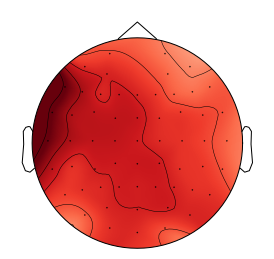

In [34]:
im = mne.viz.plot_topomap(coh, info.info)


In [73]:
def plot_coherence(data,vmax,vmin,axes,name,info): 
    im = mne.viz.plot_topomap(data, info.info, axes=axes, show=False,vmin=vmin,vmax=vmax)
    axes.set(title=name)
    return im

def plot_coherence_preprocess(x,name,condition,delay,info):
    vmax=np.amax(np.concatenate(x, axis=0))
    vmin=np.amin(np.concatenate(x, axis=0))

    fig, axes = plt.subplots(1, 3,figsize=(10,4))
    for i in range(0,3):
        im = plot_coherence(x[i],vmax,vmin,axes[i],condition[i],info)

    fig.suptitle(name[0]+'-Delay-'+ str(delay)+ '-'+name[1])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.35, 0.04, 0.3])
    fig.colorbar(im[0], cax=cbar_ax)
    fig.show()

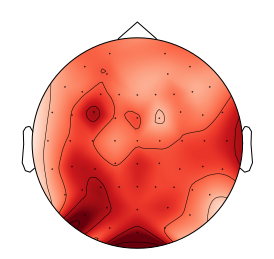

In [74]:
condition = ['Hyper','Normal','Hypo']
name = ('TTCD','Theta 4 - 7Hz')
delay = 0.2
im = mne.viz.plot_topomap(coh, info.info)


In [ ]:
C = CoherenceAnalyzer(T)

freq_idx = np.where((C.frequencies > f_lb) * (C.frequencies < f_ub))[0]
coh = np.mean(C.coherence[:, :, freq_idx], -1)  # Averaging on the last dimension
idx = np.hstack([idx_lcau, idx_rcau, idx_lput, idx_rput])
idx1 = np.vstack([[idx[i]] * 4 for i in range(4)]).ravel()
idx2 = np.hstack(4 * [idx])

coh = C.coherence[idx1, idx2].reshape(4, 4, C.frequencies.shape[0])
idx3 = np.hstack(16 * [idx_lcau])
coh = C.coherence_partial[idx1, idx2, idx3].reshape(4, 4, C.frequencies.shape[0])
coh = np.mean(coh[:, :, freq_idx], -1)
fig06 = drawmatrix_channels(coh, roi_names[idx], color_anchor=0)

In [33]:
C.coherence_partial[idx1, idx2, idx3].shape

(59, 33)

In [ ]:

import nitime
#Import the time-series objects:
from nitime.timeseries import TimeSeries
#Import the analysis objects:
from nitime.analysis import CoherenceAnalyzer
#Import utility functions:
from nitime.utils import percent_change
from nitime.viz import drawmatrix_channels, drawgraph_channels, plot_xcorr


In [ ]:
# let's explore some frequency bands
iter_freqs = [
    ('Delta', 1, 3),
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 40)
]
features = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
condition = ['Hyper','Normal','Hypo']
delay = np.arange(0,1.1,0.1)
indices = (np.repeat(60,59),np.arange(0,59))   


for s in tqdm_notebook(range(0,len(subject_name)), desc='Subjects'):
    frames = []
    for f in tqdm_notebook(range(0,len(features)), desc='Features'):
        feature = features[f]
        
        for band, fmin, fmax in iter_freqs:
            a = band+ ' '+str(fmin)+' - '+str(fmax)+'Hz'
            
            for d in delay:
                hyper, normal, hypo = listen_italian_functions.coherence_preprocess(GA_epoches[s],feature,d,trial_len)
                
                hyper, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(hyper,fmin, fmax,indices)
                normal, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(normal,fmin, fmax,indices)
                hypo, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(hypo,fmin, fmax,indices)
                
                df = pd.DataFrame({'Condition':'Hyper','Freq':a,'Delay':d,'Feature':feature,
                                   'noTrials':GA_epoches[s]['hyper'].get_data().shape[0],
                                   'Subject':subject_name[s],'Data':[hyper.flatten()]})

                df = df.append(pd.DataFrame({'Condition':'Normal','Freq':a,'Delay':d,'Feature':feature,
                                             'noTrials':GA_epoches[s]['normal'].get_data().shape[0],
                                             'Subject':subject_name[s],'Data':[normal.flatten()]}))

                df = df.append(pd.DataFrame({'Condition':'Hypo','Freq':a,'Delay':d,'Feature':feature,
                                             'noTrials':GA_epoches[s]['hypo'].get_data().shape[0],
                                             'Subject':subject_name[s],'Data':[hypo.flatten()]}))
                frames.append(df)
                print(d)
    
    data=pd.concat((frames),axis=0)
    save_path = data_path + '/analysis/python/data/coherence-trialLen-'+str(trial_len)+'-'+subject_name[s]
    data.to_pickle(save_path)
